In [2]:
%pylab notebook
import pycwt
import exdir
import os
import exdir.plugins.quantities
import pathlib

Populating the interactive namespace from numpy and matplotlib


In [3]:
rcParams['figure.figsize'] = (9, 6)

In [4]:
project_path = os.environ.get("SEPTUM_MEC_DATA")
if project_path is None:
    raise Exception("Need to set `SEPTUM_MEC_DATA` as environment variable first.")
else:
    project_path = pathlib.Path(project_path)

action_id = '1849-060319-2'

channel_group = 0

channel = 0 # 0-3

In [5]:
path = pathlib.Path(project_path)
exdir_file = exdir.File(path / 'actions'/ action_id / 'data'/ 'main.exdir',
                       plugins=exdir.plugins.quantities)
lfp_group = exdir_file[
    'processing/electrophysiology/channel_group_{}/LFP/LFP_timeseries_{}'.format(channel_group, channel)]
data = lfp_group['data'].data.flatten()

sampling_frequency = lfp_group['data'].attrs['sample_rate'].magnitude
sampling_period = 1 / sampling_frequency

times = arange(0, sampling_period * len(data), sampling_period)

<IPython.core.display.Javascript object>


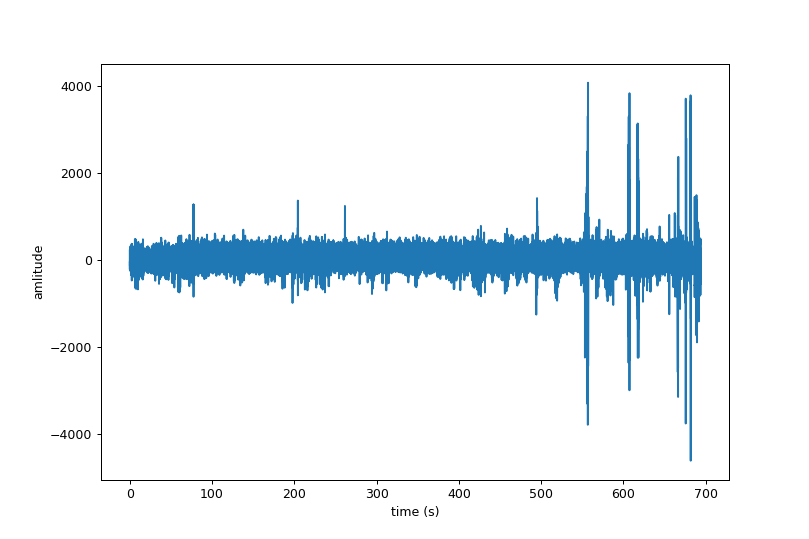

Text(0.5, 0, 'time (s)')

In [6]:
start_time = 0
stop_time = 10000

mask = (start_time < times) & (times < stop_time) # seconds
figure()
plot(times[mask], data[mask])
ylabel('amlitude')
xlabel('time (s)')

In [7]:
def mask_coi(power, freqs, coi):
    periods = 1 / freqs
    for i in range(power.shape[1]):
        mask = periods > coi[i]
        power[mask, i] = nan

<IPython.core.display.Javascript object>


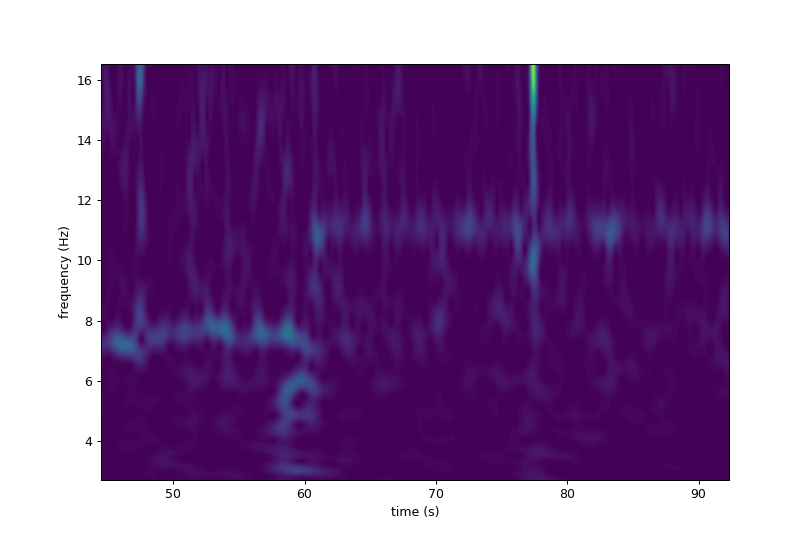

Text(0.5, 0, 'time (s)')

In [8]:
start_time = 0
stop_time = 200

mask = (start_time < times) & (times < stop_time) # seconds

mother = pycwt.Morlet(20) # Morlet size
freqs = arange(1, 30, .1) # Frequency range

wave, scales, freqs, coi, fft, fftfreqs = pycwt.cwt(data[mask], sampling_period, freqs=freqs, wavelet=mother)

power = (numpy.abs(wave)) ** 2
power /= scales[:, None] #rectify the power spectrum according to the suggestions proposed by Liu et al. (2007)

mask_coi(power, freqs, coi)

figure()
contourf(times[mask], freqs, power, levels=100)
    
ylabel('frequency (Hz)')
xlabel('time (s)')

<IPython.core.display.Javascript object>


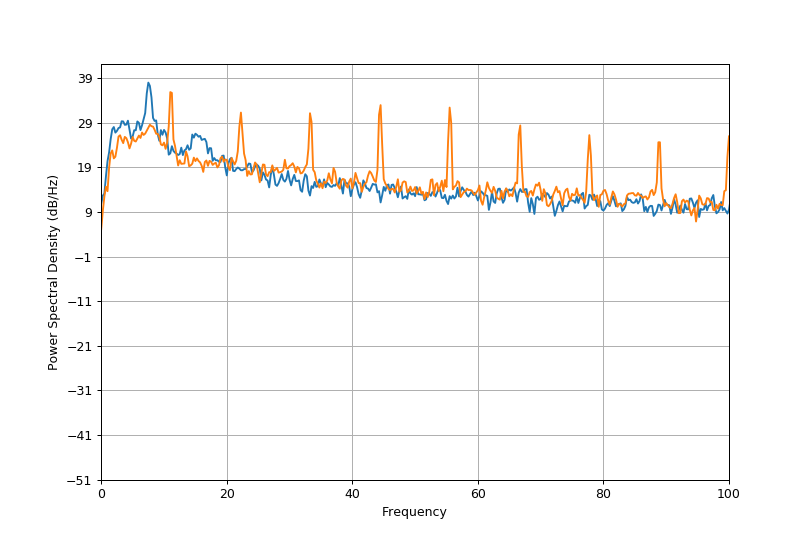

(0, 100)

In [11]:
start_time = 0
stop_time = 60

mask = (start_time < times) & (times < stop_time) # seconds

figure()
psd(data[mask], Fs=sampling_frequency, NFFT=4000)
xlim(0,100)

start_time = 80
stop_time = 140

mask = (start_time < times) & (times < stop_time) # seconds

psd(data[mask], Fs=sampling_frequency, NFFT=4000)
xlim(0,100)

<IPython.core.display.Javascript object>


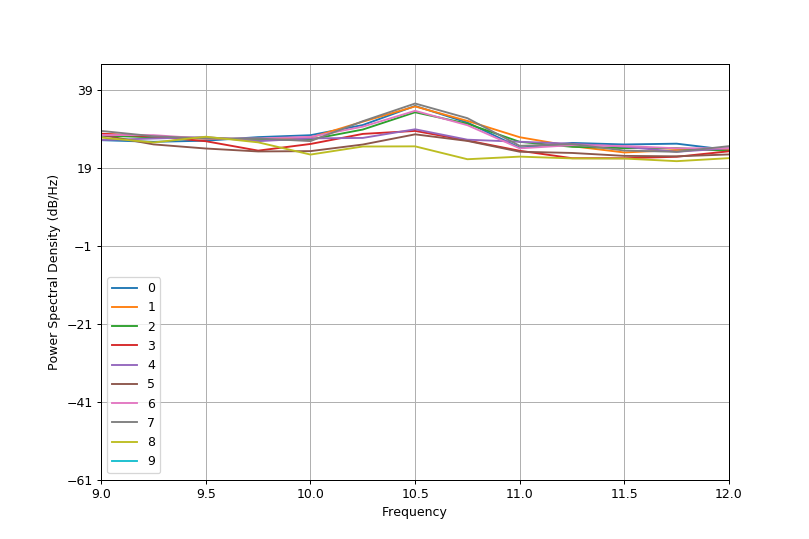

In [37]:
figure()
res = []
for a in range(10):
    start_time = 0 + a * 100
    stop_time = 100 + a * 100

    mask = (start_time < times) & (times < stop_time) # seconds

    res.append(psd(data[mask], Fs=sampling_frequency, NFFT=4000, label=str(a)))
    xlim(9,12)
legend()

In [38]:
for r in res:
    d, f = r
    m = max(d[(f > 10) & (f < 12)])
    print(m)

3047.718811979059
2961.626429230799
2097.3403246981807
697.8280948770996
768.3221513502772
569.4523630813541
2283.5699345835383
3519.0121729181164
280.24967552191845
0.0
